In [1]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
events = range(25)

label_dict = pickle.load( open( "../data/LAC/label_dict.p", "rb" ) )

label_dict = {v:k for k,v in label_dict.items()}

def confusion_matrix(accuracy_df):
    n_categories = len(events) + 1
    all_categories = events
    all_cat_names = [label_dict[ii] for ii in all_categories]

    confusion = np.zeros((n_categories, n_categories))

    num_mapping = dict(zip(all_categories, range(n_categories)))

    # Go through test and record which are correctly guessed
    for i in range(len(accuracy_df)):
        actual = accuracy_df['y_t'].iloc[i]
        predicted = accuracy_df['y_hat'].iloc[i]
        confusion[num_mapping[actual], num_mapping[predicted]] += 1

    # Normalize by dividing every row by its sum
    for i in range(n_categories):
        confusion[i] = confusion[i] / confusion[i].sum()

    #%%
    # Set up plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion)
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + all_cat_names, rotation=90)
    ax.set_yticklabels([''] + all_cat_names)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # add in the number
    for cat in all_categories:
        sub_df = accuracy_df[accuracy_df['y_t']==cat]
        if len(sub_df) > 0:
            acc = len(sub_df[sub_df['y_hat']==cat]) / len(sub_df)
        else:
            acc = 0
        plt.text(s=round(acc, 2), x=num_mapping[cat], y=28.5, rotation=90, ha='center')
    # sphinx_gallery_thumbnail_number = 2
    # plt.show()
    plt.tight_layout()
    plt.savefig('../Data/heatmap.png', dpi=600)


In [3]:
validate_stacked = pd.read_csv('../data/LAC/validate_stacked.csv')
validate_combined = pd.read_csv('../data/LAC/validate_combined.csv')

In [4]:
model = ClassificationModel('roberta'
                            , '../data/LAC/StackedModel'
                            , num_labels=25
                            , args={
                                'n_gpu':1
                                ,'eval_batch_size':768})

result, model_outputs, wrong_predictions = model.eval_model(validate_stacked)

y_t = validate_stacked.labels
y_hat = [np.argmax(a) for a in model_outputs]
print(sklearn.metrics.classification_report(y_true=y_t, y_pred=y_hat))

100%|██████████| 1/1 [00:02<00:00,  2.01s/it]{'mcc': 0.7592387889884228, 'eval_loss': 2.2516157627105713}
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.91      0.88      0.89        24
           2       0.76      0.89      0.82        18
           3       0.94      0.80      0.86        20
           4       0.82      0.69      0.75        26
           5       0.71      0.83      0.77        24
           6       0.76      0.79      0.77        28
           7       0.69      0.57      0.62        70
           8       0.73      0.80      0.77        51
           9       0.63      0.71      0.67        17
          10       0.77      0.85      0.81        27
          11       0.77      0.71      0.74        28
          12       0.92      0.96      0.94        23
          13       0.71      0.92      0.80        13
          15       0.74      0.71      0.72        24
          16       0.90      

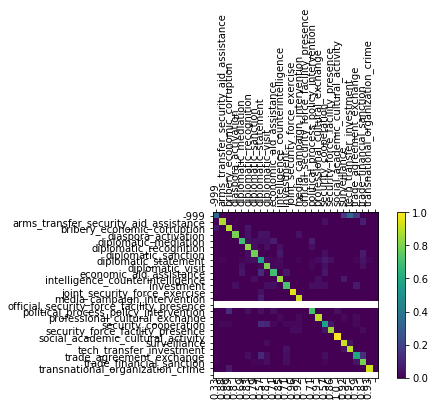

In [5]:
acc_df = pd.DataFrame({'y_t': y_t, 'y_hat':y_hat})

confusion_matrix(acc_df)

In [6]:
model = ClassificationModel('roberta'
                            , '../data/LAC/CombinedModel'
                            , num_labels=25
                            , args={
                                'n_gpu':1
                                ,'eval_batch_size':768})

result, model_outputs, wrong_predictions = model.eval_model(validate_combined)

y_t = validate_combined.labels
y_hat = [np.argmax(a) for a in model_outputs]
print(sklearn.metrics.classification_report(y_true=y_t, y_pred=y_hat))

100%|██████████| 1/1 [00:00<00:00,  1.14it/s]{'mcc': 0.7747009125345792, 'eval_loss': 1.897948145866394}
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.50      1.00      0.67         4
           2       0.70      0.88      0.78         8
           3       0.75      0.75      0.75         8
           4       0.75      0.50      0.60        12
           5       0.83      0.88      0.86        17
           6       0.62      0.89      0.73         9
           7       0.58      0.56      0.57        25
           8       0.79      0.83      0.81        18
           9       0.77      0.83      0.80        12
          10       0.89      0.80      0.84        10
          11       0.85      0.85      0.85        20
          12       1.00      1.00      1.00        12
          13       0.86      0.86      0.86        14
          15       0.64      0.64      0.64        14
          16       1.00      0

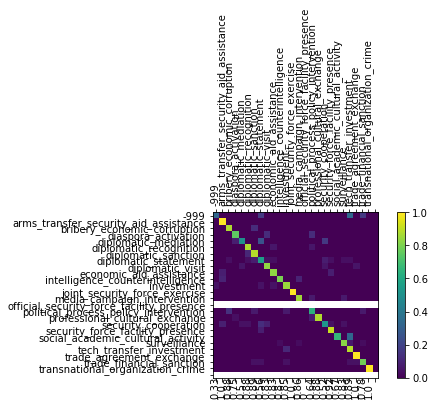

In [7]:
acc_df = pd.DataFrame({'y_t': y_t, 'y_hat':y_hat})

confusion_matrix(acc_df)

In [61]:
label_dict[14]

'official_security_force_facility_presence'